In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("global_superstore_2016.csv", encoding = 'latin1')

In [3]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,11-11-2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.770,High
1,26341,IN-2014-JR162107-41675,02-05-2014,02-07-2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,($288.77),923.630,Critical
2,25330,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.490,Medium
3,13524,ES-2014-KM1637548-41667,1/28/2014,1/30/2014,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,($96.54),910.160,Medium
4,47221,SG-2014-RH9495111-41948,11-05-2014,11-06-2014,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.040,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2015-KE1642066-42174,6/19/2015,6/19/2015,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,...,OFF-FA-3072,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",$65.10,5,0.0,$4.50,1.010,Medium
51286,34337,US-2014-ZD21925140-41765,05-06-2014,05-10-2014,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,...,FUR-FU-4070,Furniture,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",$16.72,5,0.2,$3.34,1.930,High
51287,31315,CA-2012-ZD21925140-41147,8/26/2012,8/31/2012,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,...,OFF-AR-5321,Office Supplies,Art,Newell 341,$8.56,2,0.0,$2.48,1.580,High
51288,9596,MX-2013-RB1979518-41322,2/17/2013,2/21/2013,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,...,OFF-BI-2919,Office Supplies,Binders,"Acco Index Tab, Economy",$13.44,2,0.0,$2.40,1.003,Medium


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   Postal Code     9994 non-null   float64
 9   City            51290 non-null  object 
 10  State           51290 non-null  object 
 11  Country         51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Market          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [5]:
# df['Order Date'] = pd.to_datetime(df['Order Date'].fillna(df['Order Date'].astype(str).str.replace('-', '/')))

In [6]:
df['Order Date'] = df['Order Date'].astype(str).str.replace('-', '/')

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [8]:
df['Ship Date'] = df['Ship Date'].astype(str).str.replace('-', '/')

In [9]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [10]:
df['Sales'] = df['Sales'].replace('[\$,()]', '', regex=True).astype(float)
df['Profit'] = df['Profit'].replace('[\$,()]', '', regex=True).astype(float)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   Postal Code     9994 non-null   float64       
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [12]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.770,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,288.77,923.630,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.490,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,96.54,910.160,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.040,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2015-KE1642066-42174,2015-06-19,2015-06-19,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,...,OFF-FA-3072,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.10,5,0.0,4.50,1.010,Medium
51286,34337,US-2014-ZD21925140-41765,2014-05-06,2014-05-10,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,...,FUR-FU-4070,Furniture,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",16.72,5,0.2,3.34,1.930,High
51287,31315,CA-2012-ZD21925140-41147,2012-08-26,2012-08-31,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,...,OFF-AR-5321,Office Supplies,Art,Newell 341,8.56,2,0.0,2.48,1.580,High
51288,9596,MX-2013-RB1979518-41322,2013-02-17,2013-02-21,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,...,OFF-BI-2919,Office Supplies,Binders,"Acco Index Tab, Economy",13.44,2,0.0,2.40,1.003,Medium


In [13]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490685,3.476545,0.142908,64.510750,26.478567
std,14806.29199,32063.693350,487.565388,2.278766,0.212280,164.473988,57.251373
min,1.00000,1040.000000,0.440000,1.000000,0.000000,0.000000,1.002000
25%,12823.25000,23223.000000,30.762500,2.000000,0.000000,6.300000,2.610000
50%,25645.50000,56430.500000,85.055000,3.000000,0.000000,18.620000,7.790000
75%,38467.75000,90008.000000,251.055000,5.000000,0.200000,57.240000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.980000,933.570000


###  Total, how many orders have cross the shipping cost of 500?

In [14]:
Shipping_cost_order = (df['Shipping Cost']>500).sum()

In [15]:
Shipping_cost_order

120

###  Count the number of segments, countries, regions, markets, categories, and sub-categories present in the global_superstore_2016 data.  

In [16]:
segments_value_counts = df['Segment'].value_counts()
countries_value_counts = df['Country'].value_counts()
regions_value_counts = df['Region'].value_counts()
markets_value_counts = df['Market'].value_counts()
categories_value_counts = df['Category'].value_counts()
subcategories_value_counts = df['Sub-Category'].value_counts()

In [17]:
print("Segments value counts:")
print(segments_value_counts)
print("\nCountries value counts:")
print(countries_value_counts)
print("\nRegions value counts:")
print(regions_value_counts)
print("\nMarkets value counts:")
print(markets_value_counts)
print("\nCategories value counts:")
print(categories_value_counts)
print("\nSub-Categories value counts:")
print(subcategories_value_counts)

Segments value counts:
Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64

Countries value counts:
United States    9994
Australia        2837
France           2827
Mexico           2635
Germany          2063
                 ... 
Bhutan              1
Malawi              1
Kuwait              1
Suriname            1
The Gambia          1
Name: Country, Length: 165, dtype: int64

Regions value counts:
Western Europe       5883
Central America      5616
Oceania              3487
Western US           3203
Southeastern Asia    3129
South America        2988
Eastern US           2848
Southern Asia        2655
Western Asia         2440
Eastern Asia         2374
Central US           2323
Northern Europe      2204
Southern Europe      2113
Caribbean            1690
Southern US          1620
Eastern Europe       1529
Western Africa       1460
North Africa         1278
Eastern Africa        728
Central Africa        643
Southern Africa       478
Canada   

###  Get the list of Order ID's where the Indian customer's have bought the things under the category "Technology' after paying the Shipping Cost more than 5000

In [18]:
filtered_df = df[(df['Country'] == 'India') & (df['Category'] == 'Technology') & (df['Shipping Cost'] > 500)]

In [19]:
order_ids = filtered_df['Order ID'].tolist()

In [20]:
print(order_ids)

['IN-2015-BF1100558-42319', 'IN-2015-SW2027558-42125', 'IN-2013-SG2047058-41424', 'IN-2013-GP1474058-41419']


###  Get the list of Order ID's where the Indian customer's have bought the things under the category "Technology' the Sales greater than 500..

In [21]:
df['Total Sales'] = df['Quantity'] * df['Sales']

In [22]:
filtered_df = df[(df['Country'] == 'India') & (df['Category'] == 'Technology') & (df['Total Sales'] > 500)]

In [23]:
order_ids = filtered_df['Order ID'].tolist()

In [24]:
print(order_ids)

['IN-2015-BF1100558-42319', 'IN-2015-SW2027558-42125', 'IN-2013-SG2047058-41424', 'IN-2013-GP1474058-41419', 'IN-2014-SV2081558-41968', 'IN-2015-AP1072058-42284', 'IN-2015-CR1282058-42294', 'IN-2012-AB1010558-41270', 'IN-2014-CA1277558-41802', 'IN-2015-AF1088558-42222', 'IN-2012-CL1270058-41226', 'IN-2012-MG1820558-40962', 'IN-2015-CY1274558-42300', 'IN-2014-MR1754558-41954', 'IN-2015-CC1247558-42129', 'IN-2013-NZ1856558-41398', 'IN-2012-DM1352558-41123', 'IN-2013-DL1333058-41328', 'IN-2013-BW1111058-41404', 'IN-2014-JE1561058-41895', 'IN-2013-LW1682558-41376', 'IN-2012-DP1316558-41173', 'IN-2013-CS1246058-41609', 'IN-2013-CC1268558-41619', 'IN-2015-JW1522058-42101', 'IN-2013-TB2119058-41552', 'IN-2014-LR1691558-41899', 'IN-2015-DM1334558-42182', 'IN-2014-ZC2191058-41760', 'IN-2014-DK1298558-41863', 'IN-2014-MS1798058-41801', 'IN-2014-LB1679558-41893', 'IN-2014-CC1237058-41710', 'IN-2014-GZ1447058-41721', 'IN-2014-AS1028558-41877', 'IN-2012-LR1703558-41195', 'IN-2013-SW2024558-41425', 

###  How many people from the State 'Karnataka' have bought the things under the category 'Technology"??

In [25]:
filtered_df = df[(df['State'] == 'Karnataka') & (df['Category'] == 'Technology')]

In [26]:
num_customers = filtered_df['Customer ID'].nunique()

In [27]:
num_customers

16

### Get the list of countries where the 'Profit' and 'Shipping Cost's are greater than or equal to 2000 and 300 respectively..

In [28]:
filtered_df = df[(df['Profit'] >= 2000) & (df['Shipping Cost'] >= 300)]

In [29]:
unique_countries = filtered_df['Country'].unique()

In [30]:
print(unique_countries)

['Italy' 'India' 'Morocco' 'Netherlands' 'United Kingdom' 'Japan'
 'Lithuania' 'Australia' 'Pakistan' 'United States']


###  Find the list of Indian states where the people have purchased the things under the category Technology.  

In [31]:
filtered_df = df[(df['Country'] == 'India') & (df['Category'] == 'Technology')]

In [32]:
unique_states = filtered_df['State'].unique()

In [33]:
print(unique_states)

['Haryana' 'Jharkhand' 'Madhya Pradesh' 'Delhi' 'Gujarat' 'Bihar' 'Kerala'
 'Chhattisgarh' 'Tamil Nadu' 'West Bengal' 'Maharashtra' 'Karnataka'
 'Rajasthan' 'Uttar Pradesh' 'Andhra Pradesh' 'Telangana' 'Odisha'
 'Punjab' 'Assam' 'Uttarakhand' 'Puducherry' 'Jammu and Kashmir']


### Find the overall rank of "India" where the 'Profit' is maximum under the category 'Technology'. 

In [34]:
technology_df = df[df['Category'] == 'Technology']

In [35]:
max_profit_by_country = technology_df.groupby('Country')['Profit'].max()

In [36]:
ranked_countries = max_profit_by_country.sort_values(ascending=False).reset_index()

In [37]:
india_rank = ranked_countries[ranked_countries['Country'] == 'India'].index[0] + 1

In [38]:
print(india_rank)

5


### Display the data with min, max, average and std of 'Profit' & 'Sales' for each Sub-Category under each Category  

In [39]:
agg_funcs = {
    'Profit': ['min', 'max', 'mean', 'std'],
    'Sales': ['min', 'max', 'mean', 'std']
}

In [40]:
result = df.groupby(['Category', 'Sub-Category']).agg(agg_funcs).reset_index()

In [41]:
result.columns = ['Category', 'Sub-Category', 'Profit Min', 'Profit Max', 'Profit Mean', 'Profit Std', 'Sales Min', 'Sales Max', 'Sales Mean', 'Sales Std']

In [42]:
print(result)

           Category Sub-Category  Profit Min  Profit Max  Profit Mean  \
0         Furniture    Bookcases         0.0     2316.51   151.313799   
1         Furniture       Chairs         0.0     2211.17    96.845271   
2         Furniture  Furnishings         0.0      561.96    32.919220   
3         Furniture       Tables         0.0     2750.28   260.352021   
4   Office Supplies   Appliances         0.0     3979.08   154.726515   
5   Office Supplies          Art         0.0      371.23    20.795995   
6   Office Supplies      Binders         0.0     4946.37    28.994784   
7   Office Supplies    Envelopes         0.0      279.36    21.188395   
8   Office Supplies    Fasteners         0.0      127.26    10.178531   
9   Office Supplies       Labels         0.0      385.38     8.654617   
10  Office Supplies        Paper         0.0      352.30    22.540272   
11  Office Supplies      Storage         0.0      802.17    51.603367   
12  Office Supplies     Supplies         0.0     10

### Dashboard

C:\Users\niket\AppData\Local\Temp\ipykernel_27088\1456881966.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Category', y='Sales', ci=None)
C:\Users\niket\AppData\Local\Temp\ipykernel_27088\1456881966.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Region', y='Profit', ci=None)
C:\Users\niket\AppData\Local\Temp\ipykernel_27088\1456881966.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Ship Mode', y='Sales', ci=None)


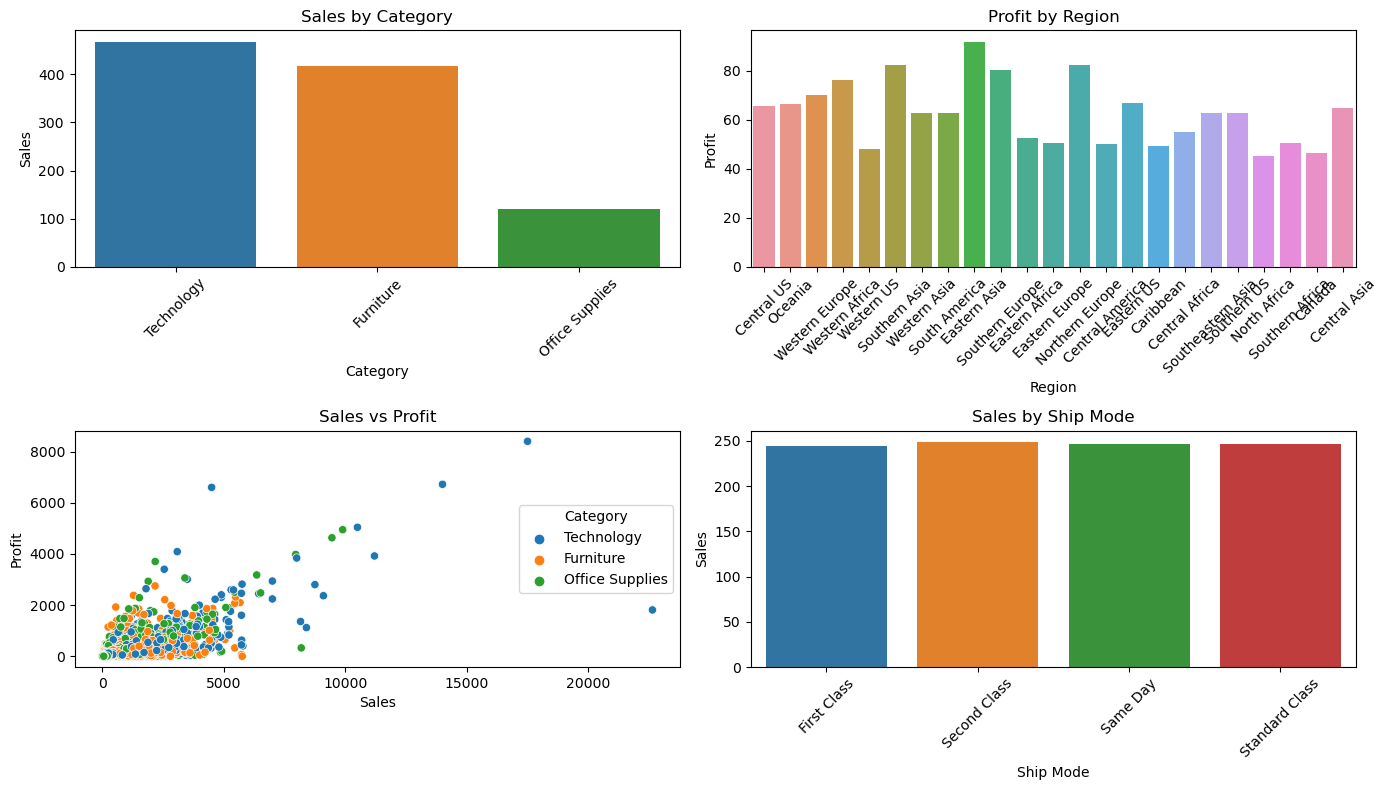

In [47]:
plt.figure(figsize=(14, 8))

# Sales by Category
plt.subplot(2, 2, 1)
sns.barplot(data=df, x='Category', y='Sales', ci=None)
plt.title('Sales by Category')
plt.xticks(rotation=45)

# Profit by Region
plt.subplot(2, 2, 2)
sns.barplot(data=df, x='Region', y='Profit', ci=None)
plt.title('Profit by Region')
plt.xticks(rotation=45)

# Sales vs Profit Scatter Plot
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category')
plt.title('Sales vs Profit')

# Sales by Ship Mode
plt.subplot(2, 2, 4)
sns.barplot(data=df, x='Ship Mode', y='Sales', ci=None)
plt.title('Sales by Ship Mode')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()